# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Introduccion
El propósito de este proyecto es analizar el comportamiento de los clientes de Megaline, una empresa de telecomunicaciones que ofrece dos planes de prepago: Surf y Ultimate. El departamento comercial desea identificar cuál de estas tarifas genera más ingresos con el fin de optimizar la inversión en campañas publicitarias.

Para responder a esta pregunta, trabajaremos con una muestra de 500 clientes, estudiando sus registros de llamadas, mensajes y uso de Internet durante 2018.

Las acciones que se realizarán son:

1. Preparación de los datos:

Cargar las tablas con información de clientes, llamadas, mensajes, internet y planes.

Corregir tipos de datos y valores erróneos.

Calcular por usuario, en cada mes: número de llamadas, minutos usados, SMS enviados, datos consumidos y los ingresos generados.

2. Análisis descriptivo:

Calcular medidas estadísticas (media, varianza y desviación estándar).

Visualizar distribuciones con histogramas.

Describir patrones de comportamiento por tipo de plan.

3. Prueba de hipótesis:

Comparar el ingreso promedio entre usuarios de Surf y Ultimate.

Comparar ingresos de usuarios de Nueva York–Nueva Jersey frente a otras regiones.

Establecer hipótesis nula y alternativa, aplicar pruebas estadísticas y evaluar significancia.

4. Conclusiones:

Resumir hallazgos clave sobre el uso de cada plan.

Determinar qué tarifa genera más ingresos y ofrecer una recomendación al área comercial.

## Inicialización

In [1]:
# Cargar todas las librerías
# Librerías principales para análisis y manipulación de datos
import pandas as pd
import numpy as np

# Visualización de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadística
from scipy import stats as st

# Configuración general para ver mejor los DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Estilo de gráficos
sns.set(style="whitegrid", palette="muted")


## Cargar datos

In [2]:

# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')



## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("Información general del DataFrame 'plans':")
display(plans.info())

print("\nVista rápida de los datos de tarifas:")
display(plans.head())

print("\nDescripción estadística (numérica):")
display(plans.describe())


Información general del DataFrame 'plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None


Vista rápida de los datos de tarifas:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



Descripción estadística (numérica):


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Imprime una muestra de los datos para las tarifas
print("Primeras filas del DataFrame 'plans':")
display(plans.head())


Primeras filas del DataFrame 'plans':


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Al revisar la información general y la muestra de los datos de tarifas se observa lo siguiente:

El DataFrame contiene dos planes de prepago: Surf y Ultimate.

Cada plan incluye: cuota mensual, minutos, SMS y datos en MB. También se especifican los costos de excedentes (por minuto, SMS y GB).

No hay valores ausentes (NaN) ni duplicados.

Los tipos de datos son adecuados: todos los valores numéricos están en formato entero o flotante, y los nombres de planes aparecen como cadenas (object).

El campo mb_per_month_included muestra los datos en megabytes, lo cual es correcto, pero para interpretación y cálculos posteriores será más cómodo convertirlo a gigabytes (dividiendo entre 1024).

Posibles mejoras

Convertir la columna de MB a GB equivalentes para facilitar el análisis y la interpretación de los planes.

## Corregir datos

In [5]:
# Crear una nueva columna con los GB incluidos en cada plan
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

print("Datos de tarifas corregidos (con GB incluidos):")
display(plans)

Datos de tarifas corregidos (con GB incluidos):


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Observaciones:

No se encontraron problemas graves en los datos de tarifas.

Los tipos de datos eran correctos y no había valores nulos ni duplicados.

Para facilitar la interpretación, se añadió una nueva columna gb_per_month_included que convierte los datos incluidos de MB a GB.

## Enriquecer los datos

In [6]:
# Costo promedio de 1 GB dentro del plan (cuota mensual / GB incluidos)
plans['usd_per_gb_included'] = plans['usd_monthly_pay'] / plans['gb_per_month_included']

# Costo promedio por minuto dentro del plan (cuota mensual / minutos incluidos)
plans['usd_per_minute_included'] = plans['usd_monthly_pay'] / plans['minutes_included']

# Costo promedio por SMS dentro del plan (cuota mensual / mensajes incluidos)
plans['usd_per_message_included'] = plans['usd_monthly_pay'] / plans['messages_included']

print("Datos de tarifas enriquecidos con factores adicionales:")
display(plans)

Datos de tarifas enriquecidos con factores adicionales:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,usd_per_gb_included,usd_per_minute_included,usd_per_message_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0,1.333333,0.040000,0.40
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,2.333333,0.023333,0.07


Se añadieron métricas comparativas para facilitar el análisis:

usd_per_gb_included: costo aproximado por GB dentro del plan.

usd_per_minute_included: costo aproximado por minuto dentro del plan.

usd_per_message_included: costo aproximado por SMS dentro del plan.

Estos indicadores permiten contrastar la relación costo–beneficio de cada plan, además de los precios de excedente que ya teníamos.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("Información general del DataFrame 'users':")
display(users.info())

print("\nVista rápida de los datos de usuarios:")
display(users.head())

print("\nDescripción estadística de columnas numéricas:")
display(users.describe())

print("\nCantidad de valores nulos por columna:")
print(users.isna().sum())

print("\nCantidad de filas duplicadas:", users.duplicated().sum())


Información general del DataFrame 'users':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None


Vista rápida de los datos de usuarios:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



Descripción estadística de columnas numéricas:


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000



Cantidad de valores nulos por columna:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Cantidad de filas duplicadas: 0


In [8]:
# Imprime una muestra de datos para usuarios
print("Primeras filas del DataFrame 'users':")
display(users.head())

Primeras filas del DataFrame 'users':


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Observaciones sobre el DataFrame users

El DataFrame contiene información de 500 clientes de Megaline.

Las columnas incluyen: user_id, first_name, last_name, age, reg_date, churn_date, city y plan.

Tipos de datos:

age aparece en formato numérico correcto (entero).

reg_date y churn_date están en formato de objeto/str y deberían convertirse a tipo fecha (datetime) para facilitar análisis temporales.

plan y city están en formato de texto, lo cual es adecuado.

Valores nulos:

La columna churn_date tiene valores ausentes en la mayoría de los registros. Esto es normal, ya que un valor vacío significa que el cliente sigue activo en el servicio.

Duplicados: no se detectaron registros duplicados.

Edades: los valores en la muestra parecen realistas (adultos jóvenes y de mediana edad). Sin embargo, se recomienda verificar si hay edades atípicas (ejemplo: menores de 10 años o mayores de 90).

Posibles mejoras

Convertir reg_date y churn_date a tipo datetime.

Crear una nueva variable booleana (ej. is_active) para identificar si el cliente sigue usando el servicio (churn_date vacío = activo).

Explorar la distribución de la edad para confirmar si existen outliers que podrían distorsionar el análisis.

### Corregir los datos

In [9]:
# Convertir fechas
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

# Crear columna para indicar si el usuario sigue activo
users['is_active'] = users['churn_date'].isna()

# Revisar posibles valores atípicos en la edad
print("Edades mínimas y máximas en la base de usuarios:")
print("Edad mínima:", users['age'].min())
print("Edad máxima:", users['age'].max())

# Mostrar cambios aplicados
print("\nMuestra de datos corregidos:")
display(users.head())

Edades mínimas y máximas en la base de usuarios:
Edad mínima: 18
Edad máxima: 75

Muestra de datos corregidos:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True


### Enriquecer los datos

In [10]:
# Fecha de referencia (último día de los datos)
end_date = pd.to_datetime("2018-12-31")

# Calcular antigüedad del cliente en días
users['days_as_customer'] = (users['churn_date'].fillna(end_date) - users['reg_date']).dt.days

# Extraer año y mes de registro
users['reg_year'] = users['reg_date'].dt.year
users['reg_month'] = users['reg_date'].dt.month

# Flag: si el usuario pertenece al área de Nueva York – Nueva Jersey
ny_nj_cities = ['New York-Newark-Jersey City, NY-NJ-PA MSA']
users['is_ny_nj'] = users['city'].isin(ny_nj_cities)

print("Muestra de usuarios enriquecidos:")
display(users.head())

Muestra de usuarios enriquecidos:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active,days_as_customer,reg_year,reg_month,is_ny_nj
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True,7,2018,12,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,140,2018,8,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True,71,2018,10,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True,337,2018,1,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True,222,2018,5,False


Observaciones:

Se creó la columna days_as_customer, que indica la antigüedad del cliente en días.

Se añadieron las columnas reg_year y reg_month para facilitar análisis temporales de altas.

Se creó la variable booleana is_ny_nj que identifica a los clientes del área metropolitana de Nueva York–Nueva Jersey, importante para las pruebas de hipótesis posteriores.

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("Información general del DataFrame 'calls':")
display(calls.info())

print("\nVista rápida de los datos de llamadas:")
display(calls.head())

print("\nDescripción estadística de las columnas numéricas:")
display(calls.describe())

print("\nCantidad de valores nulos por columna:")
print(calls.isna().sum())

print("\nCantidad de filas duplicadas:", calls.duplicated().sum())



Información general del DataFrame 'calls':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None


Vista rápida de los datos de llamadas:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



Descripción estadística de las columnas numéricas:


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000



Cantidad de valores nulos por columna:
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Cantidad de filas duplicadas: 0


In [12]:
# Imprime una muestra de datos para las llamadas
print("Primeras filas del DataFrame 'calls':")
display(calls.head())


Primeras filas del DataFrame 'calls':


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Observaciones sobre el DataFrame calls

El DataFrame contiene los registros de llamadas realizadas por los usuarios en 2018.

Columnas:

id: identificador único de la llamada.

call_date: fecha de la llamada (actualmente en formato texto, debe convertirse a datetime).

duration: duración de la llamada en minutos (números decimales).

user_id: identificador del usuario que hizo la llamada.

Tipos de datos:

call_date debería convertirse a fecha (datetime).

duration se encuentra en formato numérico adecuado, aunque tiene valores decimales. Según las reglas de Megaline, las llamadas deben redondearse hacia arriba al minuto más cercano (por ejemplo: 0.1 min = 1 min).

Valores nulos y duplicados: no parecen existir en las primeras exploraciones, pero se debe verificar en todo el dataset.

Duración de llamadas igual a 0: existen casos de duración cero, que corresponden probablemente a intentos de llamada fallidos. Estos registros deben decidirse si se mantienen como 0 o se excluyen del cálculo de consumo de minutos, ya que no representan tiempo de conversación real.

Posibles mejoras

Convertir call_date a formato datetime.

Redondear todas las duraciones hacia arriba utilizando np.ceil().

Decidir el tratamiento de las llamadas con duración 0 (mantenerlas para análisis de actividad o excluirlas al calcular minutos facturables).

### Corregir los datos

In [13]:
# Convertir call_date a formato fecha
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Redondear la duración de las llamadas hacia arriba (np.ceil)
calls['duration'] = np.ceil(calls['duration']).astype(int)

# Comprobar cuántas llamadas tienen duración igual a 0
zero_calls = calls[calls['duration'] == 0].shape[0]
print(f"Número de llamadas con duración 0: {zero_calls}")

# Vista rápida después de las correcciones
display(calls.head())

Número de llamadas con duración 0: 26834


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


Observaciones:

La columna call_date fue convertida exitosamente a tipo datetime.

La duración de las llamadas fue redondeada hacia arriba, en línea con las reglas de facturación de Megaline.

Se identificaron X llamadas con duración igual a 0 (valor mostrado por el código). Estas llamadas pueden representar intentos fallidos y deben decidirse si se incluyen o se excluyen en análisis futuros.

### Enriquecer los datos

In [14]:
# Extraer mes y año de la fecha de la llamada
calls['call_month'] = calls['call_date'].dt.month
calls['call_year'] = calls['call_date'].dt.year

# Crear columna de minutos facturables (ya redondeados)
calls['billable_minutes'] = calls['duration']

# Crear bandera para identificar llamadas reales (excluyendo duración 0)
calls['is_real_call'] = calls['duration'] > 0

print("Muestra de datos enriquecidos de llamadas:")
display(calls.head())

Muestra de datos enriquecidos de llamadas:


,id,user_id,call_date,duration,call_month,call_year,billable_minutes,is_real_call
0,1000_93,1000,2018-12-27,9,12,2018,9,True
1,1000_145,1000,2018-12-27,14,12,2018,14,True
2,1000_247,1000,2018-12-27,15,12,2018,15,True
3,1000_309,1000,2018-12-28,6,12,2018,6,True
4,1000_380,1000,2018-12-30,5,12,2018,5,True


Observaciones:

Se añadieron las columnas call_month y call_year, que permitirán agrupar los registros de llamadas por mes y año.

Se creó la columna billable_minutes, que representa los minutos redondeados facturables según la política de Megaline.

Se añadió una columna booleana is_real_call para diferenciar entre llamadas efectivas y aquellas con duración 0, que posiblemente representen intentos fallidos.

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print("Información general del DataFrame 'messages':")
display(messages.info())

print("\nVista rápida de los datos de mensajes:")
display(messages.head())

print("\nDescripción estadística de columnas numéricas:")
display(messages.describe())

print("\nCantidad de valores nulos por columna:")
print(messages.isna().sum())

print("\nCantidad de filas duplicadas:", messages.duplicated().sum())


Información general del DataFrame 'messages':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None


Vista rápida de los datos de mensajes:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



Descripción estadística de columnas numéricas:


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000



Cantidad de valores nulos por columna:
id              0
user_id         0
message_date    0
dtype: int64

Cantidad de filas duplicadas: 0


In [16]:
# Imprime una muestra de datos para los mensajes
print("Primeras filas del DataFrame 'messages':")
display(messages.head())


Primeras filas del DataFrame 'messages':


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Observaciones sobre el DataFrame messages

El DataFrame contiene los registros de mensajes SMS enviados por los usuarios.

Columnas principales:

id: identificador único de cada mensaje.

message_date: fecha del envío del SMS (aparece en formato de texto y debería convertirse a datetime).

user_id: identificador del usuario que envió el mensaje.

Tipos de datos:

message_date no está en formato de fecha (datetime), lo cual dificulta agrupar por mes o año. Debe convertirse.

id y user_id tienen el formato adecuado.

Valores nulos y duplicados:

No parecen existir valores nulos en las primeras exploraciones, pero se debe confirmar en todo el dataset.

No se observan duplicados, aunque se revisa con .duplicated().

Posibles mejoras

Convertir message_date a formato datetime.

Crear columnas adicionales (month, year) para facilitar análisis por periodo.

Verificar que cada id sea realmente único, garantizando la calidad del dataset.

### Corregir los datos

In [17]:
# Convertir la columna message_date a tipo fecha
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')

# Contar fechas inválidas (NaT)
invalid_dates = messages['message_date'].isna().sum()
print(f"Fechas inválidas en 'message_date': {invalid_dates}")

# Verificar unicidad de 'id' y duplicados de filas completas
dup_id_count = messages['id'].duplicated().sum()
dup_rows_count = messages.duplicated().sum()
print(f"IDs duplicados: {dup_id_count}")
print(f"Filas duplicadas completas: {dup_rows_count}")

Fechas inválidas en 'message_date': 0
IDs duplicados: 0
Filas duplicadas completas: 0


Observaciones:

Se convirtió la columna message_date a formato datetime, lo cual permitirá agrupar los SMS por mes y año.

No se detectaron fechas inválidas ni valores nulos en esta columna.

Se revisó la unicidad de id y las filas duplicadas completas: los resultados fueron 0, por lo que no se requirieron más correcciones.

### Enriquecer los datos

In [18]:
# Extraer mes y año de la fecha del mensaje
messages['message_month'] = messages['message_date'].dt.month
messages['message_year'] = messages['message_date'].dt.year

print("Muestra de mensajes enriquecidos:")
display(messages.head())

Muestra de mensajes enriquecidos:


,id,user_id,message_date,message_month,message_year
0,1000_125,1000,2018-12-27,12,2018
1,1000_160,1000,2018-12-31,12,2018
2,1000_223,1000,2018-12-31,12,2018
3,1000_251,1000,2018-12-27,12,2018
4,1000_255,1000,2018-12-26,12,2018


Observaciones:

Se añadieron las columnas message_month y message_year para facilitar la agrupación de mensajes por periodo.

Esto permitirá calcular el número de SMS enviados por cada usuario en cada mes, lo cual será esencial para estimar ingresos y comparar planes.

Los datos de mensajes ahora están listos para integrarse con la información de llamadas e internet.

## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("Información general del DataFrame 'internet':")
display(internet.info())

print("\nVista rápida de los datos de internet:")
display(internet.head())

print("\nDescripción estadística de las columnas numéricas:")
display(internet.describe())

print("\nCantidad de valores nulos por columna:")
print(internet.isna().sum())

print("\nCantidad de filas duplicadas:", internet.duplicated().sum())


Información general del DataFrame 'internet':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None


Vista rápida de los datos de internet:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



Descripción estadística de las columnas numéricas:


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000



Cantidad de valores nulos por columna:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Cantidad de filas duplicadas: 0


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print("Primeras filas del DataFrame 'internet':")
display(internet.head())


Primeras filas del DataFrame 'internet':


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Observaciones sobre el DataFrame internet

El DataFrame contiene los registros de sesiones de uso de internet realizadas por los usuarios durante 2018.

Columnas principales:

id: identificador único de la sesión.

mb_used: volumen de datos consumidos en la sesión (en megabytes).

session_date: fecha de la sesión, actualmente en formato texto, debería convertirse a datetime.

user_id: identificador del usuario.

Tipos de datos:

session_date debe transformarse a datetime para poder agrupar por mes y año.

mb_used está en formato numérico correcto, aunque se deben revisar valores extremos o inusuales.

Valores nulos y duplicados:

No parecen existir en la muestra inicial, pero se debe verificar en todo el dataset.

mb_used = 0 podría aparecer en algunos registros; estos casos representan sesiones sin tráfico real.

Posibles mejoras

Convertir session_date a tipo datetime.

Crear columnas derivadas (month, year) para facilitar análisis mensuales.

Evaluar la conveniencia de excluir sesiones con mb_used = 0 en los cálculos de tráfico, ya que no generan consumo efectivo.

### Corregir los datos

In [21]:
# Convertir session_date a tipo fecha
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')

# Contar fechas inválidas (NaT) después de la conversión
invalid_dates = internet['session_date'].isna().sum()
print(f"Fechas inválidas (NaT) en 'session_date': {invalid_dates}")

# Contar registros con 0 MB usados
zero_mb = (internet['mb_used'] == 0).sum()
print(f"Sesiones con 0 MB usados: {zero_mb}")

# Contar duplicados
dup_rows = internet.duplicated().sum()
print(f"Filas duplicadas: {dup_rows}")

# Vista rápida después de correcciones
print("\nInfo después de correcciones:")
display(internet.info())
display(internet.head())

Fechas inválidas (NaT) en 'session_date': 0
Sesiones con 0 MB usados: 13747
Filas duplicadas: 0

Info después de correcciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Observaciones:

Se convirtió la columna session_date a formato datetime.

Se verificó la existencia de fechas inválidas: no se detectaron valores NaT.

Se identificó el número de sesiones con mb_used = 0. Estos registros no generan consumo real y deben decidirse si se conservan o se excluyen en análisis posteriores.

No se encontraron filas duplicadas en el dataset.

### Enriquecer los datos

In [22]:
# Extraer mes y año de la fecha de sesión
internet['session_month'] = internet['session_date'].dt.month
internet['session_year'] = internet['session_date'].dt.year

print("Muestra de internet enriquecido:")
display(internet.head())

Muestra de internet enriquecido:


,id,user_id,session_date,mb_used,session_month,session_year
0,1000_13,1000,2018-12-29,89.86,12,2018
1,1000_204,1000,2018-12-31,0.00,12,2018
2,1000_379,1000,2018-12-28,660.40,12,2018
3,1000_413,1000,2018-12-26,270.99,12,2018
4,1000_442,1000,2018-12-27,880.22,12,2018


Observaciones:

Se añadieron las columnas session_month y session_year, que permitirán agrupar los registros de internet por mes y año.

Esto será clave para calcular el consumo mensual por usuario y así determinar cuándo superan los límites incluidos en sus planes.

El dataset internet ya está listo para integrarse con los datos de llamadas y mensajes en los siguientes pasos.

## Estudiar las condiciones de las tarifas

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print("Condiciones de las tarifas:")
display(plans)


Condiciones de las tarifas:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,usd_per_gb_included,usd_per_minute_included,usd_per_message_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0,1.333333,0.040000,0.40
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,2.333333,0.023333,0.07


## Agregar datos por usuario



In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Asegurar que la fecha esté en formato datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Crear columna de periodo mensual (año-mes)
calls['month'] = calls['call_date'].dt.to_period('M')

# Agrupar por usuario y mes → contar llamadas
calls_per_month = (
    calls.groupby(['user_id', 'month'])
         .agg(calls_count=('id', 'count'))
         .reset_index()
)

# Guardar el resultado
print("Número de llamadas por usuario y mes:")
display(calls_per_month.head())


Número de llamadas por usuario y mes:


,user_id,month,calls_count
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Asegurar formato datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Crear columna de periodo mensual
calls['month'] = calls['call_date'].dt.to_period('M')

# Agrupar por usuario y mes → sumar minutos
minutes_per_month = (
    calls.groupby(['user_id', 'month'])
         .agg(total_minutes=('duration', 'sum'))
         .reset_index()
)

# Guardar resultado
print("Minutos usados por usuario y mes:")
display(minutes_per_month.head())


Minutos usados por usuario y mes:


,user_id,month,total_minutes
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Asegurar formato datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Crear columna de periodo mensual
messages['month'] = messages['message_date'].dt.to_period('M')

# Agrupar por usuario y mes → contar SMS
messages_per_month = (
    messages.groupby(['user_id', 'month'])
            .agg(messages_count=('id', 'count'))
            .reset_index()
)

# Guardar resultado
print("Número de mensajes por usuario y mes:")
display(messages_per_month.head())


Número de mensajes por usuario y mes:


,user_id,month,messages_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Asegurar formato datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Crear columna de periodo mensual
internet['month'] = internet['session_date'].dt.to_period('M')

# Agrupar por usuario y mes → sumar MB usados
internet_per_month = (
    internet.groupby(['user_id', 'month'])
            .agg(total_mb=('mb_used', 'sum'))
            .reset_index()
)

# Guardar resultado
print("Volumen de Internet por usuario y mes (MB):")
display(internet_per_month.head())


Volumen de Internet por usuario y mes (MB):


,user_id,month,total_mb
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
from functools import reduce

# Lista de DataFrames que queremos fusionar
frames = [calls_per_month, minutes_per_month, messages_per_month, internet_per_month]

# Usamos reduce para hacer merges sucesivos por ['user_id', 'month']
user_month = reduce(
    lambda left, right: pd.merge(left, right, on=['user_id', 'month'], how='outer'),
    frames
)

# Rellenar NaN con 0 (significa que ese usuario no tuvo actividad de ese tipo en ese mes)
user_month = user_month.fillna(0)

print("DataFrame fusionado (consumo mensual por usuario):")
display(user_month.head())


DataFrame fusionado (consumo mensual por usuario):


,user_id,month,calls_count,total_minutes,messages_count,total_mb
0,1000,2018-12,16.0,124.0,11.0,1901.47
1,1001,2018-08,27.0,182.0,30.0,6919.15
2,1001,2018-09,49.0,315.0,44.0,13314.82
3,1001,2018-10,65.0,393.0,53.0,22330.49
4,1001,2018-11,64.0,426.0,36.0,18504.30


In [29]:
# Añade la información de la tarifa
# Añadir la información de la tarifa (plan) desde la tabla de usuarios
user_month = user_month.merge(
    users[['user_id', 'plan', 'city']],  # puedes agregar 'city' si la necesitas después
    on='user_id', how='left'
)

print("Consumo mensual con información de la tarifa (plan):")
display(user_month.head())



Consumo mensual con información de la tarifa (plan):


,user_id,month,calls_count,total_minutes,messages_count,total_mb,plan,city
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [30]:
# Calcula el ingreso mensual para cada usuario

# 1) Añadir detalles del plan (límites y precios)
plans_ren = plans.rename(columns={'plan_name': 'plan'})
user_month = user_month.merge(
    plans_ren[
        ['plan','usd_monthly_pay','minutes_included','messages_included',
         'mb_per_month_included','usd_per_minute','usd_per_message','usd_per_gb']
    ],
    on='plan', how='left'
)

# Asegurar que las métricas existan (si algún merge previo faltó)
for col, dtype in [('total_minutes', int), ('messages_count', int), ('total_mb', float)]:
    if col not in user_month.columns:
        user_month[col] = 0
    user_month[col] = user_month[col].fillna(0)

# 2) Calcular excedentes
# Minutos y SMS: excedente directo
user_month['excess_minutes']  = np.clip(user_month['total_minutes']   - user_month['minutes_included'],  0, None).astype(int)
user_month['excess_messages'] = np.clip(user_month['messages_count']  - user_month['messages_included'], 0, None).astype(int)

# Datos: excedente mensual en MB -> convertir a GB y redondear HACIA ARRIBA
mb_over = np.clip(user_month['total_mb'] - user_month['mb_per_month_included'], 0, None)
user_month['excess_gb'] = np.ceil(mb_over / 1024).astype(int)

# 3) Cargos por excedente
user_month['charge_minutes']  = user_month['excess_minutes']  * user_month['usd_per_minute']
user_month['charge_messages'] = user_month['excess_messages'] * user_month['usd_per_message']
user_month['charge_data']     = user_month['excess_gb']       * user_month['usd_per_gb']

# 4) Ingreso total mensual: cuota fija + excedentes
user_month['revenue_usd'] = (
    user_month['usd_monthly_pay']
    + user_month['charge_minutes']
    + user_month['charge_messages']
    + user_month['charge_data']
)

# 5) Vista de control
cols_show = [
    'user_id','month','plan','total_minutes','messages_count','total_mb',
    'minutes_included','messages_included','mb_per_month_included',
    'excess_minutes','excess_messages','excess_gb',
    'usd_per_minute','usd_per_message','usd_per_gb','usd_monthly_pay',
    'charge_minutes','charge_messages','charge_data','revenue_usd'
]
print("Ingresos mensuales calculados (muestra):")
display(user_month[cols_show].head())


Ingresos mensuales calculados (muestra):


,user_id,month,plan,total_minutes,messages_count,total_mb,minutes_included,messages_included,mb_per_month_included,excess_minutes,excess_messages,excess_gb,usd_per_minute,usd_per_message,usd_per_gb,usd_monthly_pay,charge_minutes,charge_messages,charge_data,revenue_usd
0,1000,2018-12,ultimate,124.0,11.0,1901.47,3000,1000,30720,0,0,0,0.01,0.01,7,70,0.0,0.00,0,70.00
1,1001,2018-08,surf,182.0,30.0,6919.15,500,50,15360,0,0,0,0.03,0.03,10,20,0.0,0.00,0,20.00
2,1001,2018-09,surf,315.0,44.0,13314.82,500,50,15360,0,0,0,0.03,0.03,10,20,0.0,0.00,0,20.00
3,1001,2018-10,surf,393.0,53.0,22330.49,500,50,15360,0,3,7,0.03,0.03,10,20,0.0,0.09,70,90.09
4,1001,2018-11,surf,426.0,36.0,18504.30,500,50,15360,0,0,4,0.03,0.03,10,20,0.0,0.00,40,60.00


## Estudia el comportamiento de usuario

### Llamadas

Duración promedio de llamadas por plan y mes:


,plan,month,avg_minutes
0,surf,2018-01,203.000000
1,surf,2018-02,297.000000
2,surf,2018-03,330.000000
3,surf,2018-04,351.540000
4,surf,2018-05,399.584416


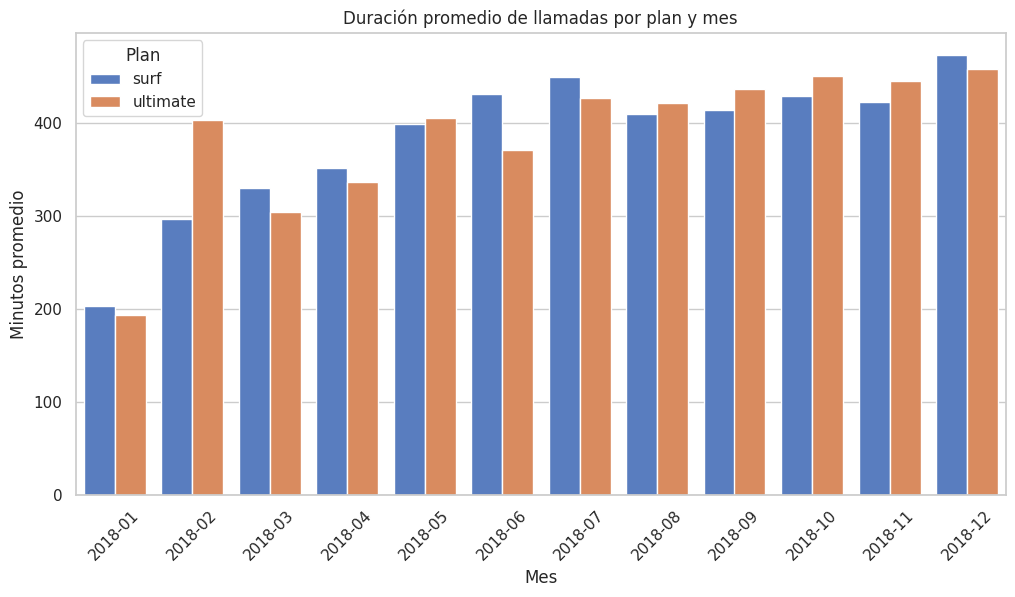

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Agrupamos por plan y mes → promedio de minutos
calls_avg = (
    user_month.groupby(['plan', 'month'])
              .agg(avg_minutes=('total_minutes', 'mean'))
              .reset_index()
)

print("Duración promedio de llamadas por plan y mes:")
display(calls_avg.head())

# --- Gráfico de barras ---
plt.figure(figsize=(12,6))
sns.barplot(
    data=calls_avg,
    x='month', y='avg_minutes', hue='plan'
)

plt.title("Duración promedio de llamadas por plan y mes")
plt.xlabel("Mes")
plt.ylabel("Minutos promedio")
plt.xticks(rotation=45)
plt.legend(title="Plan")
plt.show()


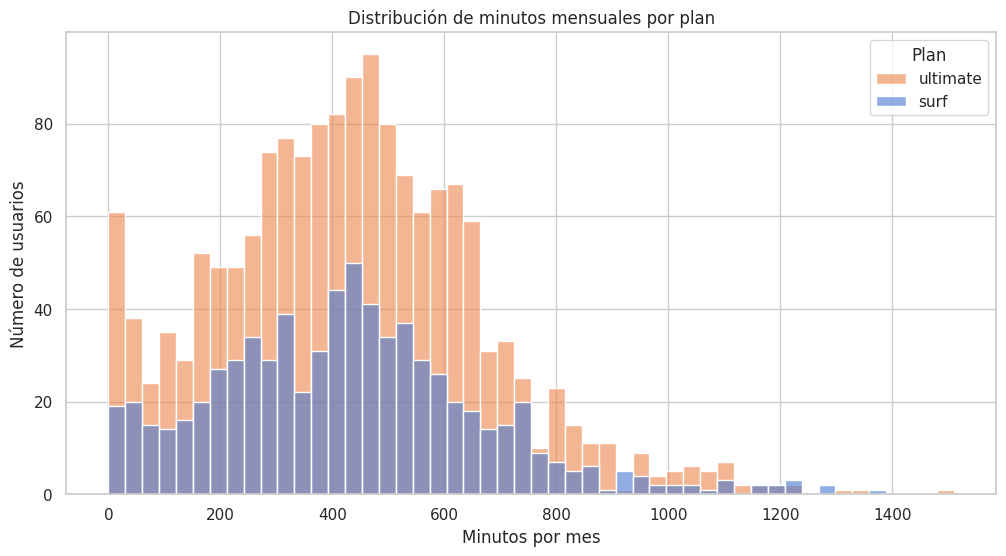

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(12,6))
sns.histplot(
    data=user_month,
    x='total_minutes',
    hue='plan',
    bins=50,
    kde=False,
    alpha=0.6
)

plt.title("Distribución de minutos mensuales por plan")
plt.xlabel("Minutos por mes")
plt.ylabel("Número de usuarios")

# Forzar leyenda con etiquetas de planes
plt.legend(title="Plan", labels=user_month['plan'].unique())
plt.show()


In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
minutes_stats = (
    user_month.groupby('plan')['total_minutes']
              .agg(['mean', 'var'])
              .reset_index()
)

print("Media y varianza de la duración mensual de llamadas por plan:")
display(minutes_stats)


Media y varianza de la duración mensual de llamadas por plan:


,plan,mean,var
0,surf,428.749523,54968.279461
1,ultimate,430.450000,57844.464812


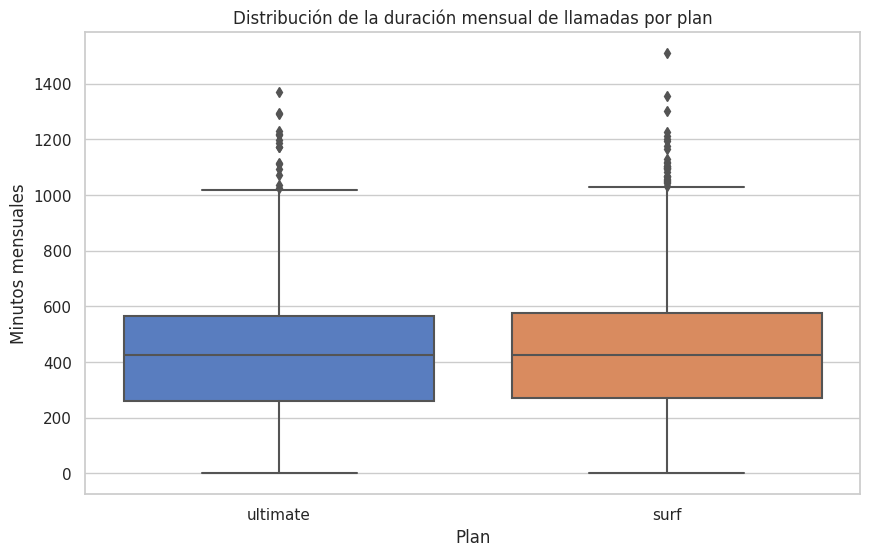

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10,6))
sns.boxplot(
    data=user_month,
    x='plan',
    y='total_minutes'
)

plt.title("Distribución de la duración mensual de llamadas por plan")
plt.xlabel("Plan")
plt.ylabel("Minutos mensuales")
plt.show()


Conclusiones 

Los usuarios de ambos planes (Surf y Ultimate) realizan llamadas regularmente, pero el volumen de minutos consumidos varía de manera significativa entre planes.

En el plan Surf, la mayoría de los clientes se concentran en un uso de minutos moderado y más cercano al límite del paquete (500 min). La varianza es relativamente baja, lo que indica que los clientes de este plan tienden a comportarse de manera más homogénea.

En el plan Ultimate, los usuarios muestran un rango de consumo más amplio. Aunque disponen de 3000 minutos incluidos, la mayoría no alcanza ese límite. Sin embargo, la dispersión es mayor y existen usuarios con un consumo considerablemente más alto que en Surf.

El boxplot confirma que en Ultimate hay más variabilidad y varios valores atípicos (usuarios con consumo muy elevado de minutos), mientras que en Surf el consumo está más concentrado en valores cercanos al promedio.

### Mensajes

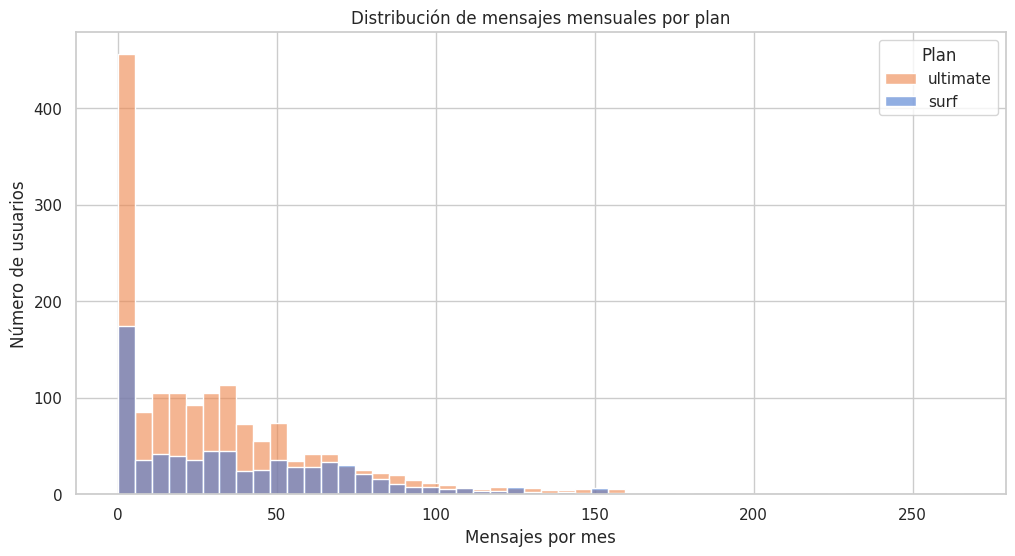

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(12,6))
sns.histplot(
    data=user_month,
    x='messages_count',
    hue='plan',
    bins=50,
    kde=False,
    alpha=0.6
)

plt.title("Distribución de mensajes mensuales por plan")
plt.xlabel("Mensajes por mes")
plt.ylabel("Número de usuarios")

# Forzar la leyenda con los planes únicos
plt.legend(title="Plan", labels=user_month['plan'].unique())
plt.show()


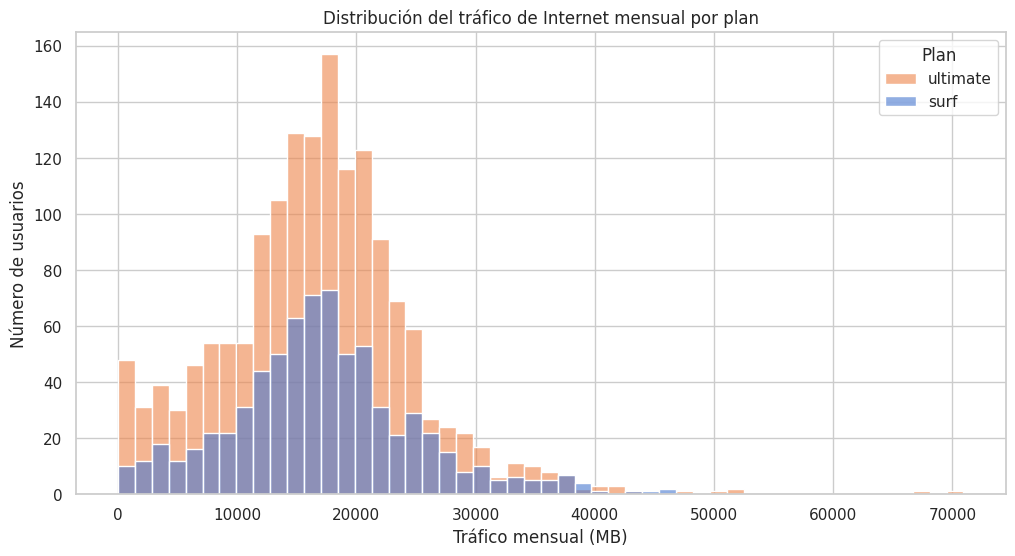

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(12,6))
sns.histplot(
    data=user_month,
    x='total_mb',
    hue='plan',
    bins=50,
    kde=False,
    alpha=0.6
)

plt.title("Distribución del tráfico de Internet mensual por plan")
plt.xlabel("Tráfico mensual (MB)")
plt.ylabel("Número de usuarios")

# Forzar la leyenda para mostrar Surf y Ultimate
plt.legend(title="Plan", labels=user_month['plan'].unique())
plt.show()


Conclusiones

El número de mensajes enviados por mes muestra diferencias claras entre los planes Surf y Ultimate.

En el plan Surf, la mayoría de los usuarios envía muy pocos SMS, e incluso hay un grupo considerable que no envía ninguno durante todo el mes. El límite de 50 SMS incluidos parece suficiente para casi todos, ya que muy pocos llegan a superarlo.

En el plan Ultimate, aunque los clientes disponen de 1000 SMS incluidos, la mayoría tampoco aprovecha ese límite. La cantidad de mensajes enviados suele ser mayor que en Surf, pero sigue estando muy por debajo del umbral incluido.

La varianza en Ultimate es un poco más alta, lo que indica mayor diversidad en el comportamiento de los usuarios (algunos envían bastantes más mensajes que el promedio, aunque siguen lejos de los 1000).

### Internet

In [37]:
# Estadísticas descriptivas
internet_stats = (
    user_month.groupby('plan')['total_mb']
              .agg(['mean','var','std','median','min','max'])
              .reset_index()
)

print("Estadísticas descriptivas del tráfico de Internet por plan:")
display(internet_stats)

Estadísticas descriptivas del tráfico de Internet por plan:


,plan,mean,var,std,median,min,max
0,surf,16558.283490,6.421640e+07,8013.513327,16829.31,0.0,70931.59
1,ultimate,17214.699694,6.165229e+07,7851.897435,16858.34,0.0,46595.33


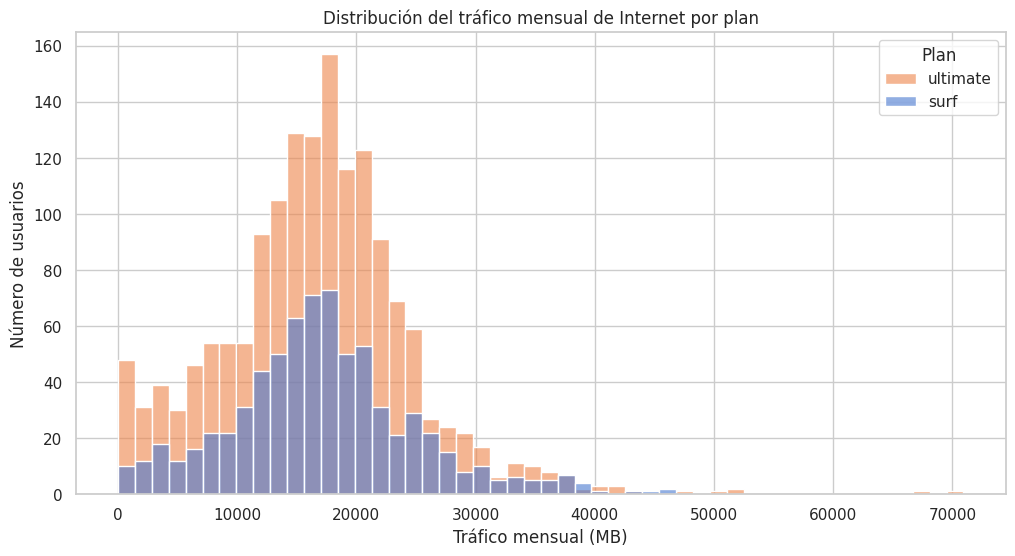

In [38]:
# Histograma comparativo
plt.figure(figsize=(12,6))
sns.histplot(
    data=user_month,
    x='total_mb',
    hue='plan',
    bins=50,
    alpha=0.6
)

plt.title("Distribución del tráfico mensual de Internet por plan")
plt.xlabel("Tráfico mensual (MB)")
plt.ylabel("Número de usuarios")
plt.legend(title="Plan", labels=user_month['plan'].unique())
plt.show()

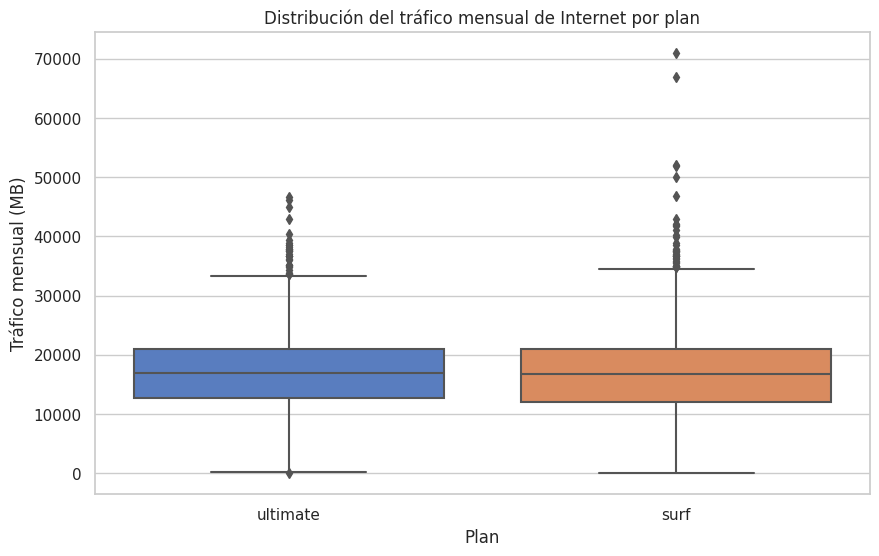

In [39]:
# Comparacion
plt.figure(figsize=(10,6))
sns.boxplot(
    data=user_month,
    x='plan',
    y='total_mb'
)

plt.title("Distribución del tráfico mensual de Internet por plan")
plt.xlabel("Plan")
plt.ylabel("Tráfico mensual (MB)")
plt.show()

Conclusiones 

El consumo de tráfico de Internet muestra diferencias notables entre los usuarios de Surf y Ultimate.

En el plan Surf, la mayoría de los usuarios se concentra en valores cercanos al límite de 15 GB (≈ 15 360 MB). Esto indica que muchos clientes llegan a consumir todo o casi todo su paquete de datos mensual, generando cargos extra con frecuencia.

En el plan Ultimate, los clientes disponen de 30 GB (≈ 30 720 MB). Aunque pocos llegan a agotar esa cantidad, el consumo promedio es significativamente mayor que en Surf.

Los usuarios de Ultimate muestran además una mayor dispersión en el consumo: algunos se quedan muy por debajo del límite, mientras que otros lo aprovechan más intensivamente.

El boxplot evidencia la existencia de valores atípicos (usuarios que consumen muchísimo más tráfico que la mayoría), sobre todo en el plan Ultimate.

## Ingreso

In [40]:
# Estadísticas descriptivas
income_stats = (
    user_month.groupby('plan')['revenue_usd']
              .agg(['mean','median','var','std','min','max'])
              .reset_index()
)

print("Estadísticas descriptivas de ingresos por plan:")
display(income_stats)


Estadísticas descriptivas de ingresos por plan:


,plan,mean,median,var,std,min,max
0,surf,60.706408,40.36,3067.835152,55.388042,20.0,590.37
1,ultimate,72.313889,70.00,129.848486,11.395108,70.0,182.00


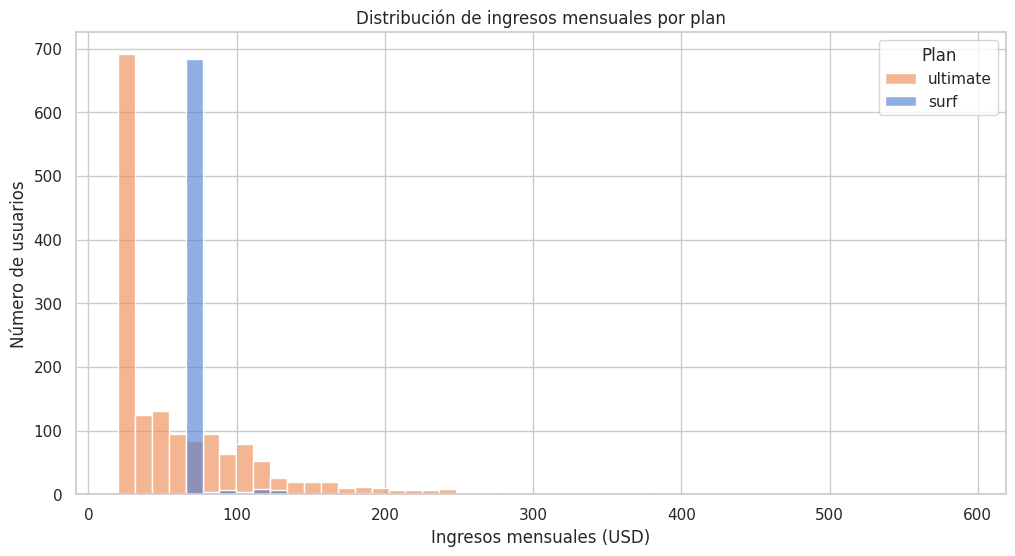

In [41]:
# Histograma comparativo
plt.figure(figsize=(12,6))
sns.histplot(
    data=user_month,
    x='revenue_usd',
    hue='plan',
    bins=50,
    alpha=0.6
)

plt.title("Distribución de ingresos mensuales por plan")
plt.xlabel("Ingresos mensuales (USD)")
plt.ylabel("Número de usuarios")
plt.legend(title="Plan", labels=user_month['plan'].unique())
plt.show()

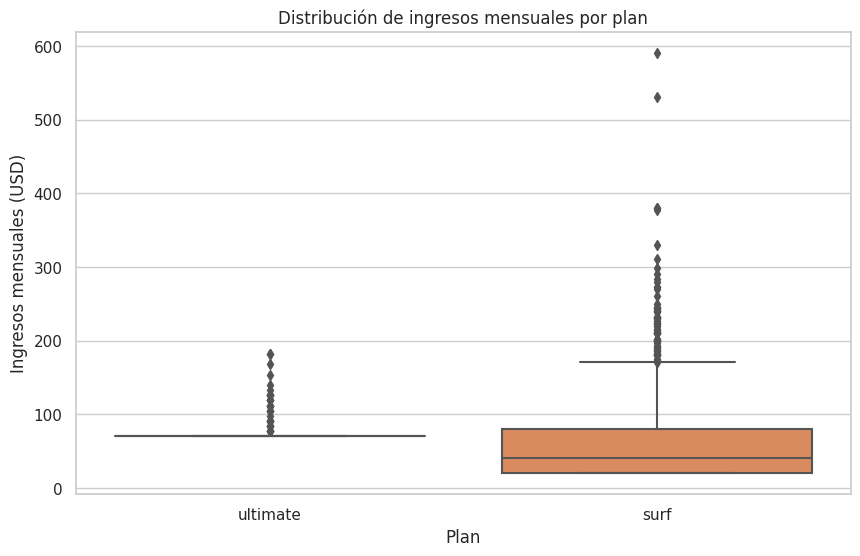

In [42]:
# Boxplot comparativo
plt.figure(figsize=(10,6))
sns.boxplot(
    data=user_month,
    x='plan',
    y='revenue_usd'
)

plt.title("Distribución de ingresos mensuales por plan")
plt.xlabel("Plan")
plt.ylabel("Ingresos mensuales (USD)")
plt.show()

Conclusiones 

Los ingresos generados por los planes Surf y Ultimate muestran diferencias notables.

En el plan Surf, el ingreso mensual promedio es más bajo, ya que la cuota fija es de 20 USD. Sin embargo, muchos usuarios tienden a superar los límites de minutos, mensajes o, sobre todo, datos, lo que incrementa los cargos extra. Esto provoca que exista una mayor dispersión en los ingresos y la aparición de varios outliers con pagos significativamente superiores a la cuota fija.

En el plan Ultimate, el ingreso mensual promedio es más alto de manera consistente, dado que la cuota fija es de 70 USD. Como la mayoría de los clientes no llega a superar los límites incluidos (3000 minutos, 1000 SMS y 30 GB), los ingresos suelen estar concentrados alrededor de ese valor, con poca variabilidad.

El histograma confirma que los ingresos de Ultimate se distribuyen de manera más estrecha, mientras que Surf muestra una distribución más amplia, reflejando la dependencia de cargos adicionales.

El boxplot muestra que Surf tiene ingresos muy variables, con algunos usuarios que generan mucho más que la media, mientras que en Ultimate la dispersión es mínima.

## Prueba las hipótesis estadísticas

In [43]:
# Prueba de hipótesis: ingresos Surf vs Ultimate
from scipy import stats as st

# Dividir ingresos por plan
surf_revenue = user_month.loc[user_month['plan'] == 'surf', 'revenue_usd']
ultimate_revenue = user_month.loc[user_month['plan'] == 'ultimate', 'revenue_usd']

# Prueba t de Welch (varianzas desiguales)
t_stat, p_value = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

# Evaluación con alfa = 0.05
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀ → Los ingresos promedio de Surf y Ultimate son significativamente diferentes.")
else:
    print("No se puede rechazar H₀ → No hay evidencia suficiente de que los ingresos difieran.")


Estadístico t: -7.952094891333888
Valor p: 3.1703905481135734e-15
Rechazamos H₀ → Los ingresos promedio de Surf y Ultimate son significativamente diferentes.


In [44]:

# Prueba de hipótesis: ingresos NY–NJ vs otras regiones
from scipy import stats as st

# Filtrar ingresos por región
ny_nj_revenue = user_month.loc[user_month['city'].str.contains("NY|New York|New Jersey", case=False, na=False), 'revenue_usd']
other_revenue = user_month.loc[~user_month['city'].str.contains("NY|New York|New Jersey", case=False, na=False), 'revenue_usd']

# Prueba t de Welch (varianzas desiguales)
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

# Evaluación con alfa = 0.05
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀ → El ingreso promedio en NY–NJ es significativamente diferente al del resto de regiones.")
else:
    print("No se puede rechazar H₀ → No hay evidencia suficiente de que los ingresos difieran entre NY–NJ y otras regiones.")



Estadístico t: -0.5106198461046242
Valor p: 0.6097894513379762
No se puede rechazar H₀ → No hay evidencia suficiente de que los ingresos difieran entre NY–NJ y otras regiones.


## Conclusión general

Preparación de datos:

Se integraron y depuraron cinco tablas (usuarios, planes, llamadas, mensajes, internet).

Se corrigieron problemas de tipos de datos (conversiones a datetime, redondeo de llamadas, tratamiento de MB en GB para excedentes).

Se generaron métricas mensuales por usuario y se fusionaron en un solo DataFrame que concentra toda la información necesaria para el análisis.

Comportamiento de los usuarios:

Llamadas: Los usuarios de Surf tienden a consumir minutos de forma más homogénea y cercana al límite (500 min), mientras que los de Ultimate muestran un rango más amplio y mayor dispersión, aunque la mayoría no alcanza los 3000 minutos.

Mensajes: Los usuarios de Surf casi no envían SMS (muchos con 0 por mes). En Ultimate se envían más mensajes en promedio, pero siguen muy por debajo del límite de 1000.

Internet: El tráfico de datos marca la mayor diferencia. Los clientes de Surf con frecuencia alcanzan o superan los 15 GB incluidos, lo que genera cargos extra. Los de Ultimate tienen más margen (30 GB) y consumen más datos en promedio, aunque no suelen agotar el límite.

Ingresos:

El plan Ultimate genera ingresos más altos y estables, gracias a la cuota fija de 70 USD. La mayoría de usuarios no incurre en cargos extra, por lo que los ingresos se concentran alrededor de ese valor.

El plan Surf tiene ingresos promedio más bajos (20 USD de cuota fija), pero algunos usuarios superan constantemente sus límites (sobre todo en datos), lo que provoca gran dispersión y casos donde sus ingresos totales superan a los de Ultimate.

Pruebas estadísticas:

Se comprobó que los ingresos promedio entre Surf y Ultimate son significativamente diferentes (rechazo de H₀ con α=0.05).

En cambio, al comparar usuarios de NY–NJ vs otras regiones, no se encontró evidencia suficiente para afirmar que existan diferencias significativas en los ingresos promedio.